In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import adaGD
import seaborn as sns

In [24]:
import sys
sys.path.append('../commonLib')

In [25]:
import pdr

In [26]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

In [27]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [28]:
y = df.iloc[0:100, 4].values

In [29]:
y =  np.where(y == 'Iris-setosa', -1, 1)

In [30]:
X = df.iloc[0:100, [0, 2]].values

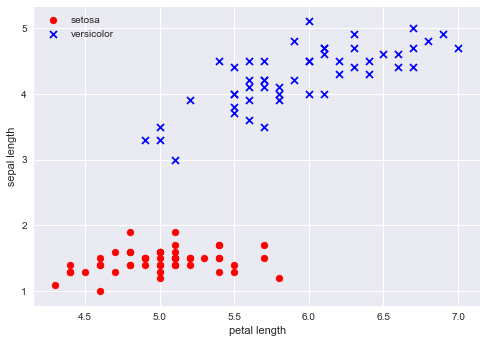

In [31]:
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

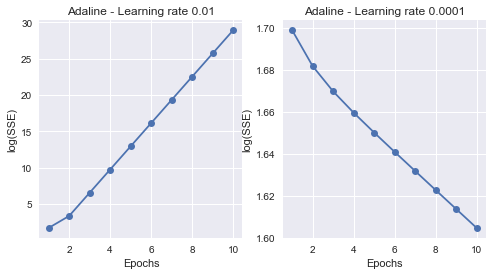

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ada1 = adaGD.AdalineGD(0.01, 10).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(SSE)')
ax[0].set_title('Adaline - Learning rate 0.01')
ada2 = adaGD.AdalineGD(0.0001, 10).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), np.log10(ada2.cost_), marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(SSE)')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

<h1>特征缩放</h1>

In [33]:
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

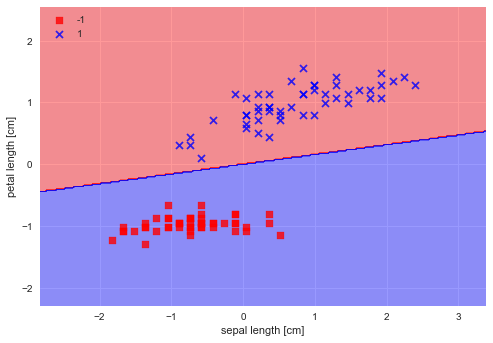

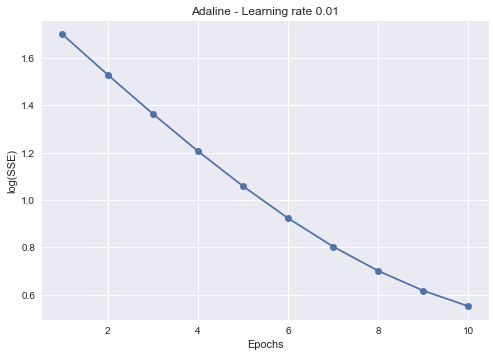

In [41]:
ada = adaGD.AdalineGD(0.01, 10).fit(X_std, y)
pdr.plot_decision_regions(X_std, y, classifier=ada)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()
plt.plot(range(1, len(ada.cost_) + 1), np.log10(ada.cost_), marker='o')
plt.xlabel('Epochs')
plt.ylabel('log(SSE)')
plt.title('Adaline - Learning rate 0.01')
plt.show()